# Homework 3. Movie review sentiment analysis

by Sofia Shchipinskaya

In [3]:
# importing libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import grid_search
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from gensim.models import word2vec

OSError: [WinError 193] %1 не является приложением Win32

### Loading and looking through the data

In [ ]:
# loading the data
data_sub = pd.read_csv("sampleSubmission.csv")
data_train = pd.read_csv("train.tsv", sep="\t")
data_test = pd.read_csv("test.tsv", sep="\t")

In [ ]:
# looking through the train data
data_train.shape[0]

In [ ]:
# looking through the train data
data_train.iloc[60:65]

In [21]:
# looking through the train data
print('Checking sample imbalance problem of train data')
print(data_train['Sentiment'].value_counts())
print(data_train['Sentiment'].value_counts(normalize=True))

Checking sample imbalance problem of train data
2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64


#### comment
As we can see, the train data is not balanced, so we have a sample imbalance problem here

In [11]:
# looking through the test data
data_test.head(5)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [12]:
# looking through the sampleSubmission data
data_sub.head(5)

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [13]:
# looking through the sampleSubmission data
print(data_sub['Sentiment'].value_counts())

2    66292
Name: Sentiment, dtype: int64


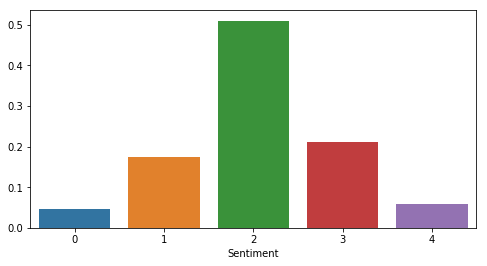

In [18]:
# constructing a graph
dist = data_train.groupby(["Sentiment"]).size()
dist = dist/dist.sum()
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(dist.keys(), dist.values);

### Classical approach

#### Vectorizing data

In [136]:
# tfidf 
train = data_train
train.iloc[60:65]

,PhraseId,SentenceId,Phrase,Sentiment
60,61,1,a story,2
61,62,1,story,2
62,63,1,.,2
63,64,2,"This quiet , introspective and entertaining in...",4
64,65,2,"This quiet , introspective and entertaining in...",3


In [137]:
phrase = train['Phrase']
phrase.head(2)

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
Name: Phrase, dtype: object

In [139]:
# tfidf 
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(phrase)
Y = train['Sentiment']
X.shape

(156060, 54911)

In [140]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#### Logistic regression and Random forest

In [141]:
# Logistic regression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
print(classification_report(y_test, LR_pred))

             precision    recall  f1-score   support

          0       0.67      0.17      0.27      1416
          1       0.55      0.30      0.39      5527
          2       0.64      0.91      0.75     15639
          3       0.59      0.43      0.50      6707
          4       0.65      0.21      0.32      1923

avg / total       0.61      0.62      0.58     31212



#### Tuning models

In [145]:
# logistic regression tuning
LR_parameters = {'penalty': ['l1', 'l2'],'C': [0.0001, 0.001, 0.01, 1, 100]}
LR_tun = grid_search.GridSearchCV(LR, LR_parameters, scoring = 'f1_weighted', cv = 8)
LR_tun.fit(X_train, y_train)
LR_tun.best_estimator_
print("Best LR parameters:", LR_tun.best_params_, "Best score:", LR_tun.best_score_)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-def

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-def

KeyboardInterrupt: 

### Word2vec approach

#### Cleaning data
Firstly we need to remove digits and punctuation and then check for empty phrases. We need to do this first because some sentences consist only of punctuation marks or digits, so after deleting them these phrases are going to be empty ones.

In [155]:
# lowercase trandformation
data_train['Phrase'] = data_train['Phrase'].map(lambda x: x.lower())
data_train.iloc[60:65]

,PhraseId,SentenceId,Phrase,Sentiment
60,61,1,a story,2
61,62,1,story,2
62,63,1,.,2
63,64,2,"this quiet , introspective and entertaining in...",4
64,65,2,"this quiet , introspective and entertaining in...",3


In [156]:
# removing punctuation
data_train['Phrase'] = data_train['Phrase'].str.replace('[^\w\s]', '')
data_train.iloc[60:66]

,PhraseId,SentenceId,Phrase,Sentiment
60,61,1,a story,2
61,62,1,story,2
62,63,1,,2
63,64,2,this quiet introspective and entertaining ind...,4
64,65,2,this quiet introspective and entertaining ind...,3
65,66,2,this,2


In [157]:
# removing digits
data_train['Phrase'] = data_train['Phrase'].str.replace('[0-9]', '')
data_train.iloc[60:65]

,PhraseId,SentenceId,Phrase,Sentiment
60,61,1,a story,2
61,62,1,story,2
62,63,1,,2
63,64,2,this quiet introspective and entertaining ind...,4
64,65,2,this quiet introspective and entertaining ind...,3


In [158]:
# removing stopwords
stop = stopwords.words('english')

pat = r'\b(?:{})\b'.format('|'.join(stop))
data_train['Phrase'] = data_train['Phrase'].str.replace(pat, '')
data_train['Phrase'] = data_train['Phrase'].str.replace(r'\s+', ' ')


data_train.iloc[60:65]

,PhraseId,SentenceId,Phrase,Sentiment
60,61,1,story,2
61,62,1,story,2
62,63,1,,2
63,64,2,quiet introspective entertaining independent ...,4
64,65,2,quiet introspective entertaining independent,3


In [159]:
# checking for empty phrases
data_train[data_train['Phrase'].str.len() == 0].head(5)

,PhraseId,SentenceId,Phrase,Sentiment
3,4,1,,2
6,7,1,,2
13,14,1,,2
16,17,1,,2
18,19,1,,2


In [160]:
# checking for empty phrases
data_train[data_train['Phrase'].str.len() == 0].count()

# THERE ARE 310 EMPTY PHRASES

PhraseId      310
SentenceId    310
Phrase        310
Sentiment     310
dtype: int64

In [161]:
# removing empty phrases

# replacing empty phrases for NaN 
data_train['Phrase'].replace('', np.nan, inplace=True)

# deliting NaN phrases
data_train.dropna(subset=['Phrase'], inplace=True)
data_train.iloc[60:65]

,PhraseId,SentenceId,Phrase,Sentiment
75,76,2,independent,2
76,77,2,worth seeking,3
77,78,2,worth seeking,4
78,79,2,worth,2
79,80,2,worth,2


In [162]:
# checking the shapes
print('The data shape that we have after deleting empty phrases:', data_train.shape[0])

# in the beginning the shape of the train data was 156060, and we had 144 empty phrases, so we need to check
print('The size of empty phrases we have deleted now:', 156060 - data_train.shape[0])

The data shape that we have after deleting empty phrases: 155750
The size of empty phrases we have deleted now: 310


#### Vectorizing

In [188]:
# define documents
docs = data_train.Phrase

# define class labels
labels = pd.get_dummies(data_train.Sentiment)

In [189]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
print('The size of vocabulary is', vocab_size)

NameError: name 'Tokenizer' is not defined